Introduction
============

This is interactive notebook regarding "Introduction to path planning". (Author: Björn Hein)

License is based on Creative Commons: Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) (pls. check: http://creativecommons.org/licenses/by-nc/4.0/)

This notebook imports all discussed algorithms and does a comparison

**Attention**: This worksheet has external dependencies 

* to the files "InnoKonz2dEnv.py" or "InnoKonzShapelyEnv.py". These files contain simple 2D environments based on numpy arrays or the shapely library with an interface for the use as collision checking in the algorithms.
* to all modules like "**Algorithm**.py", which contains the corresponding algorithms 

Important links are:

* General Info: http://www.python.org
* Python tutorial http://www.python.org/doc/tut/
* NetworkX http://networkx.github.io/
* NumPy and SciPy Guide http://docs.scipy.org/
* Matplotlib gallery http://matplotlib.sourceforge.net/gallery.html


Remember that:

* you have to press ctrl-return or shift-return, to execute the code in the code sections, only then the variables are "generated" and can be used
* you can execute the whole notebook by Cell->runAll

Änderungen BasicPRM

- Automated Planner Test:
  - IPBasicPRM_Roundtrip eingefügt
  - Eigene Methode für Planer erstellt
  - PlanRoundPath bei Visualisierung eingefügt
- IPBasicPRM_Roundtrip
  - erstellt aus IPBasicPRM
  - "Break" in "Continue" geändert bei "_learnRoadmapNearestNeighbour"
  - Funktion "PlanRoundPath" aus "PlanPath" erstellt
  - "InterimGoal" entsprechend "Start" und "Goal" eingefügt
  - InterimGoal in Lösungspfad eingebaut
- IPBenchmark
  - "InterimGoalList" eingefügt
- IPPlanerBase
  - "InterimGoalList" eingefügt
- IPTestSuite
  - Koordinate von InterimGoal hinzugefügt
- IPVISBasicPRM
  - Darstellung von Interim hinzugefügt

Adding all planners
===========


In [246]:
import sys
import HelperClass
sys.path.append("templates")
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [247]:
from IPPerfMonitor import IPPerfMonitor

import IPVISBasicPRM
import IPBasicPRM_Roundtrip

import IPVisibilityPRM_Roundtrip
import IPVISVisibilityPRM
import Optimized_IPVisibilityPRM_Roundtrip
import Grid_IPVisibilityPRM_Roundtrip
import CC_IPVisibilityPRM_Roundtrip

import IPLazyPRM_Roundtrip
import IPVISLazyPRM


Set-up of the test scenario and the configuration for all planner
===================================

Following a procedure to compare all discussed planners are shown:

1. Configuration for every planner is defined
2. The configuration and the planner is stored in the variable setup, a Python dict()
3. the variable setup is then used to uniformly call the planning calls


In [248]:
plannerFactory = dict()

#basicConfig = dict()
#basicConfig["radius"] = 3
#basicConfig["numNodes"] = 200
#plannerFactory["basePRM"] = [IPBasicPRM_Roundtrip.BasicPRM, basicConfig, IPVISBasicPRM.basicPRMVisualize]


# visbilityConfig = dict()
# visbilityConfig["ntry"] = 300
# plannerFactory["visibilityPRM"] = [IPVisibilityPRM_Roundtrip.VisPRM, visbilityConfig, IPVISVisibilityPRM.visibilityPRMVisualize ]


visbilityConfig = dict()
visbilityConfig["ntry"] = 300
plannerFactory["visibilityPRM"] = [CC_IPVisibilityPRM_Roundtrip.VisPRM, visbilityConfig, IPVISVisibilityPRM.visibilityPRMVisualize ]


# visbilityConfig = dict()
# visbilityConfig["ntry"] = 300
# plannerFactory["visibilityPRM"] = [Grid_IPVisibilityPRM_Roundtrip.VisPRM, visbilityConfig, IPVISVisibilityPRM.visibilityPRMVisualize ]


#lazyConfig = dict()
#lazyConfig["initialRoadmapSize"] = 10
#lazyConfig["updateRoadmapSize"]  = 5
#lazyConfig["kNearest"] = 5
#plannerFactory["lazyPRM"] = [IPLazyPRM_Roundtrip.LazyPRM, lazyConfig, IPVISLazyPRM.lazyPRMVisualize]

In [249]:
class ResultCollection (object):
    
    def __init__(self, plannerFactoryName, planner, benchmark, solution, perfDataFrame):
        self.plannerFactoryName = plannerFactoryName
        self.planner = planner
        self.benchmark = benchmark
        self.solution = solution
        self.perfDataFrame = perfDataFrame

In [250]:
import IPTestSuite
import importlib

In [251]:
importlib.reload(IPTestSuite)

<module 'IPTestSuite' from 'c:\\Users\\andre\\OneDrive - Hochschule Karlsruhe\\HS Karlsruhe\\1. Semester\\Roboterprogrammierung\\Projekt\\Git\\RKIM23RobotProgramDS\\02_eigeneNotebooks\\IPTestSuite.py'>

In [252]:
fullBenchList = IPTestSuite.benchList

for benchmark in fullBenchList:
    print(benchmark.name)

Trap
Bottleneck
Fat bottleneck
B_rush
circle od death


In [253]:
resultList = list()
testList = fullBenchList[:1]

for key,producer in list(plannerFactory.items()):
    HelperClass.HelperClass.printInColor(str(key)+" "+ str(producer), 'yellow')
    #print(key, producer)
    for benchmark in testList:
        HelperClass.HelperClass.printInColor("Planning: " + key + " - " + benchmark.name, 'yellow')
        #planner = IPBasicPRM.BasicPRM(benchmark.collisionChecker)
        planner = producer[0](benchmark.collisionChecker)
        IPPerfMonitor.clearData()
        

        try:
            resultList.append(ResultCollection(key,
                                        planner, 
                                        benchmark, 
                                        planner.planRoundPath(benchmark.startList,benchmark.interimGoalList,benchmark.goalList,producer[1]),
                                        IPPerfMonitor.dataFrame()),)
            #a = planner.planPath(benchmark.startList,benchmark.goalList,producer[1])
            # print("")


        except Exception as e:
            HelperClass.HelperClass.printInColor("PLANNING ERROR ! PLANNING ERROR ! PLANNING ERROR", 'red')
            HelperClass.HelperClass.printInColor(e, 'red')
            import traceback
            HelperClass.HelperClass.printInColor(traceback.print_exc(), 'red')

            pass

        

node added  interim0
node added  interim1
node added  interim2
node added  interim3
node added  interim4
1
['start', 'interim0', 'interim1', 'interim2', 'interim3', 'interim4']
1
['start', 'interim0', 'interim1', 'interim2', 'interim3', 'interim4', 0]
1
['start', 'interim0', 'interim1', 'interim2', 'interim3', 'interim4', 0, 1]
1
['start', 'interim0', 'interim1', 'interim2', 'interim3', 'interim4', 0, 1]
1
['start', 'interim0', 'interim1', 'interim2', 'interim3', 'interim4', 0, 1, 3]
1
['start', 'interim0', 'interim1', 'interim2', 'interim3', 'interim4', 0, 1, 3, 4]
1
['start', 'interim0', 'interim1', 'interim2', 'interim3', 'interim4', 0, 1, 3, 4]
1
['start', 'interim0', 'interim1', 'interim2', 'interim3', 'interim4', 0, 1, 3, 4]
1
['start', 'interim0', 'interim1', 'interim2', 'interim3', 'interim4', 0, 1, 3, 4]
1
['start', 'interim0', 'interim1', 'interim2', 'interim3', 'interim4', 0, 1, 3, 4]
1
['start', 'interim0', 'interim1', 'interim2', 'interim3', 'interim4', 0, 1, 3, 4]
1
['sta

Elemete 1 und 2  [9, 15] [3, 9]
Elemete 1 und 2  [9, 15] [19, 8]
Elemete 1 und 2  [9, 15] [3, 3]
Elemete 1 und 2  [9, 15] [20, 15]
Elemete 1 und 2  [9, 15] [10, 1]
interim0
[[[3, 9], [19, 8], [3, 3], [20, 15], [10, 1]], [9, 3, 7, 5, 5], ['interim0', 'interim1', 'interim2', 'interim3', 'interim4']]
Return  9
Nächstes Ziel-Interim:  [[3, 9], 9, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  74


Elemete 1 und 2  [16.80410002580873, 21.230277125171604] [3, 9]
Elemete 1 und 2  [16.80410002580873, 21.230277125171604] [19, 8]
Elemete 1 und 2  [16.80410002580873, 21.230277125171604] [3, 3]
Elemete 1 und 2  [16.80410002580873, 21.230277125171604] [20, 15]
Elemete 1 und 2  [16.80410002580873, 21.230277125171604] [10, 1]
interim0
[[[3, 9], [19, 8], [3, 3], [20, 15], [10, 1]], [8, 2, 6, 4, 4], ['interim0', 'interim1', 'interim2', 'interim3', 'interim4']]
Return  8
Nächstes Ziel-Interim:  [[3, 9], 8, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim1', 0, 'interim3', 1, 'interim2', 3, 'interim0']

While Schleife beginnt
TRYPATH : ['interim1', 0, 'interim3', 1, 'interim2', 3, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  interim1


Elemete 1 und 2  [19, 8] [3, 9]
Elemete 1 und 2  [19, 8] [19, 8]
Elemete 1 und 2  [19, 8] [3, 3]
Elemete 1 und 2  [19, 8] [20, 15]
Elemete 1 und 2  [19, 8] [10, 1]
interim0
[[[3, 9], [19, 8], [3, 3], [20, 15], [10, 1]], [7, 1, 5, 3, 3], ['interim0', 'interim1', 'interim2', 'interim3', 'interim4']]
Return  7
Nächstes Ziel-Interim:  [[3, 9], 7, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [0, 'interim3', 1, 'interim2', 3, 'interim0']

While Schleife beginnt
TRYPATH : [0, 'interim3', 1, 'interim2', 3, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  0


Elemete 1 und 2  [18.87076816025863, 15.172926238464985] [3, 9]
Elemete 1 und 2  [18.87076816025863, 15.172926238464985] [19, 8]
Elemete 1 und 2  [18.87076816025863, 15.172926238464985] [3, 3]
Elemete 1 und 2  [18.87076816025863, 15.172926238464985] [20, 15]
Elemete 1 und 2  [18.87076816025863, 15.172926238464985] [10, 1]
interim0
[[[3, 9], [19, 8], [3, 3], [20, 15], [10, 1]], [6, 2, 4, 2, 4], ['interim0', 'interim1', 'interim2', 'interim3', 'interim4']]
Return  6
Nächstes Ziel-Interim:  [[3, 9], 6, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim3', 1, 'interim2', 3, 'interim0']

While Schleife beginnt
TRYPATH : ['interim3', 1, 'interim2', 3, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  interim3


Elemete 1 und 2  [20, 15] [3, 9]
Elemete 1 und 2  [20, 15] [19, 8]
Elemete 1 und 2  [20, 15] [3, 3]
Elemete 1 und 2  [20, 15] [20, 15]
Elemete 1 und 2  [20, 15] [10, 1]
interim0
[[[3, 9], [19, 8], [3, 3], [20, 15], [10, 1]], [5, 3, 3, 1, 5], ['interim0', 'interim1', 'interim2', 'interim3', 'interim4']]
Return  5
Nächstes Ziel-Interim:  [[3, 9], 5, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [1, 'interim2', 3, 'interim0']

While Schleife beginnt
TRYPATH : [1, 'interim2', 3, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  1


Elemete 1 und 2  [19.41100583877495, 6.663144813125788] [3, 9]
Elemete 1 und 2  [19.41100583877495, 6.663144813125788] [19, 8]
Elemete 1 und 2  [19.41100583877495, 6.663144813125788] [3, 3]
Elemete 1 und 2  [19.41100583877495, 6.663144813125788] [20, 15]
Elemete 1 und 2  [19.41100583877495, 6.663144813125788] [10, 1]
interim0
[[[3, 9], [19, 8], [3, 3], [20, 15], [10, 1]], [4, 4, 2, 2, 6], ['interim0', 'interim1', 'interim2', 'interim3', 'interim4']]
Return  4
Nächstes Ziel-Interim:  [[3, 9], 4, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim2', 3, 'interim0']

While Schleife beginnt
TRYPATH : ['interim2', 3, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  interim2


Elemete 1 und 2  [3, 3] [3, 9]
Elemete 1 und 2  [3, 3] [19, 8]
Elemete 1 und 2  [3, 3] [3, 3]
Elemete 1 und 2  [3, 3] [20, 15]
Elemete 1 und 2  [3, 3] [10, 1]
interim0
[[[3, 9], [19, 8], [3, 3], [20, 15], [10, 1]], [3, 5, 1, 3, 7], ['interim0', 'interim1', 'interim2', 'interim3', 'interim4']]
Return  3
Nächstes Ziel-Interim:  [[3, 9], 3, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [3, 'interim0']

While Schleife beginnt
TRYPATH : [3, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  3


Elemete 1 und 2  [0.3001167982483961, 2.6854881831454405] [3, 9]
Elemete 1 und 2  [0.3001167982483961, 2.6854881831454405] [19, 8]
Elemete 1 und 2  [0.3001167982483961, 2.6854881831454405] [3, 3]
Elemete 1 und 2  [0.3001167982483961, 2.6854881831454405] [20, 15]
Elemete 1 und 2  [0.3001167982483961, 2.6854881831454405] [10, 1]
interim0
[[[3, 9], [19, 8], [3, 3], [20, 15], [10, 1]], [2, 6, 2, 4, 8], ['interim0', 'interim1', 'interim2', 'interim3', 'interim4']]
Return  2
Nächstes Ziel-Interim:  [[3, 9], 2, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim0']

While Schleife beginnt
TRYPATH : ['interim0']

For-Schleife beginnt
Aktueller Node (step):  interim0


Elemete 1 und 2  [3, 9] [3, 9]
Elemete 1 und 2  [3, 9] [19, 8]
Elemete 1 und 2  [3, 9] [3, 3]
Elemete 1 und 2  [3, 9] [20, 15]
Elemete 1 und 2  [3, 9] [10, 1]
interim0
[[[3, 9], [19, 8], [3, 3], [20, 15], [10, 1]], [1, 7, 3, 5, 9], ['interim0', 'interim1', 'interim2', 'interim3', 'interim4']]
Return  1
Nächstes Ziel-Interim:  [[3, 9], 1, 'interim0']
Ziel-Interim erreicht
Elemete 1 und 2  [3, 9] [19, 8]
Elemete 1 und 2  [3, 9] [3, 3]
Elemete 1 und 2  [3, 9] [20, 15]
Elemete 1 und 2  [3, 9] [10, 1]
interim1
[[[19, 8], [3, 3], [20, 15], [10, 1]], [7, 3, 5, 9], ['interim1', 'interim2', 'interim3', 'interim4']]
Return  7
Neues Ziel-Interim:  [[19, 8], 7, 'interim1']
Neuer Trypath:  [3, 'interim2', 1, 'interim3', 0, 'interim1']

While Schleife beginnt
TRYPATH : [3, 'interim2', 1, 'interim3', 0, 'interim1']

For-Schleife beginnt
Aktueller Node (step):  3


Elemete 1 und 2  [0.3001167982483961, 2.6854881831454405] [19, 8]
Elemete 1 und 2  [0.3001167982483961, 2.6854881831454405] [3, 3]
Elemete 1 und 2  [0.3001167982483961, 2.6854881831454405] [20, 15]
Elemete 1 und 2  [0.3001167982483961, 2.6854881831454405] [10, 1]
interim1
[[[19, 8], [3, 3], [20, 15], [10, 1]], [6, 2, 4, 8], ['interim1', 'interim2', 'interim3', 'interim4']]
Return  6
Nächstes Ziel-Interim:  [[19, 8], 6, 'interim1']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim2', 1, 'interim3', 0, 'interim1']

While Schleife beginnt
TRYPATH : ['interim2', 1, 'interim3', 0, 'interim1']

For-Schleife beginnt
Aktueller Node (step):  interim2


Elemete 1 und 2  [3, 3] [19, 8]
Elemete 1 und 2  [3, 3] [3, 3]
Elemete 1 und 2  [3, 3] [20, 15]
Elemete 1 und 2  [3, 3] [10, 1]
interim1
[[[19, 8], [3, 3], [20, 15], [10, 1]], [5, 1, 3, 7], ['interim1', 'interim2', 'interim3', 'interim4']]
Return  5
Nächstes Ziel-Interim:  [[19, 8], 5, 'interim1']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [1, 'interim3', 0, 'interim1']

While Schleife beginnt
TRYPATH : [1, 'interim3', 0, 'interim1']

For-Schleife beginnt
Aktueller Node (step):  1


Elemete 1 und 2  [19.41100583877495, 6.663144813125788] [19, 8]
Elemete 1 und 2  [19.41100583877495, 6.663144813125788] [3, 3]
Elemete 1 und 2  [19.41100583877495, 6.663144813125788] [20, 15]
Elemete 1 und 2  [19.41100583877495, 6.663144813125788] [10, 1]
interim1
[[[19, 8], [3, 3], [20, 15], [10, 1]], [4, 2, 2, 6], ['interim1', 'interim2', 'interim3', 'interim4']]
Return  4
Nächstes Ziel-Interim:  [[19, 8], 4, 'interim1']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim3', 0, 'interim1']

While Schleife beginnt
TRYPATH : ['interim3', 0, 'interim1']

For-Schleife beginnt
Aktueller Node (step):  interim3


Elemete 1 und 2  [20, 15] [19, 8]
Elemete 1 und 2  [20, 15] [3, 3]
Elemete 1 und 2  [20, 15] [20, 15]
Elemete 1 und 2  [20, 15] [10, 1]
interim1
[[[19, 8], [3, 3], [20, 15], [10, 1]], [3, 3, 1, 5], ['interim1', 'interim2', 'interim3', 'interim4']]
Return  3
Nächstes Ziel-Interim:  [[19, 8], 3, 'interim1']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [0, 'interim1']

While Schleife beginnt
TRYPATH : [0, 'interim1']

For-Schleife beginnt
Aktueller Node (step):  0


Elemete 1 und 2  [18.87076816025863, 15.172926238464985] [19, 8]
Elemete 1 und 2  [18.87076816025863, 15.172926238464985] [3, 3]
Elemete 1 und 2  [18.87076816025863, 15.172926238464985] [20, 15]
Elemete 1 und 2  [18.87076816025863, 15.172926238464985] [10, 1]
interim1
[[[19, 8], [3, 3], [20, 15], [10, 1]], [2, 4, 2, 4], ['interim1', 'interim2', 'interim3', 'interim4']]
Return  2
Nächstes Ziel-Interim:  [[19, 8], 2, 'interim1']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim1']

While Schleife beginnt
TRYPATH : ['interim1']

For-Schleife beginnt
Aktueller Node (step):  interim1


Elemete 1 und 2  [19, 8] [19, 8]
Elemete 1 und 2  [19, 8] [3, 3]
Elemete 1 und 2  [19, 8] [20, 15]
Elemete 1 und 2  [19, 8] [10, 1]
interim1
[[[19, 8], [3, 3], [20, 15], [10, 1]], [1, 5, 3, 3], ['interim1', 'interim2', 'interim3', 'interim4']]
Return  1
Nächstes Ziel-Interim:  [[19, 8], 1, 'interim1']
Ziel-Interim erreicht
Elemete 1 und 2  [19, 8] [3, 3]
Elemete 1 und 2  [19, 8] [20, 15]
Elemete 1 und 2  [19, 8] [10, 1]
interim2
[[[3, 3], [20, 15], [10, 1]], [5, 3, 3], ['interim2', 'interim3', 'interim4']]
Return  5
Neues Ziel-Interim:  [[3, 3], 5, 'interim2']
Neuer Trypath:  [0, 'interim3', 1, 'interim2']

While Schleife beginnt
TRYPATH : [0, 'interim3', 1, 'interim2']

For-Schleife beginnt
Aktueller Node (step):  0


Elemete 1 und 2  [18.87076816025863, 15.172926238464985] [3, 3]
Elemete 1 und 2  [18.87076816025863, 15.172926238464985] [20, 15]
Elemete 1 und 2  [18.87076816025863, 15.172926238464985] [10, 1]
interim2
[[[3, 3], [20, 15], [10, 1]], [4, 2, 4], ['interim2', 'interim3', 'interim4']]
Return  4
Nächstes Ziel-Interim:  [[3, 3], 4, 'interim2']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim3', 1, 'interim2']

While Schleife beginnt
TRYPATH : ['interim3', 1, 'interim2']

For-Schleife beginnt
Aktueller Node (step):  interim3


Elemete 1 und 2  [20, 15] [3, 3]
Elemete 1 und 2  [20, 15] [20, 15]
Elemete 1 und 2  [20, 15] [10, 1]
interim2
[[[3, 3], [20, 15], [10, 1]], [3, 1, 5], ['interim2', 'interim3', 'interim4']]
Return  3
Nächstes Ziel-Interim:  [[3, 3], 3, 'interim2']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [1, 'interim2']

While Schleife beginnt
TRYPATH : [1, 'interim2']

For-Schleife beginnt
Aktueller Node (step):  1


Elemete 1 und 2  [19.41100583877495, 6.663144813125788] [3, 3]
Elemete 1 und 2  [19.41100583877495, 6.663144813125788] [20, 15]
Elemete 1 und 2  [19.41100583877495, 6.663144813125788] [10, 1]
interim2
[[[3, 3], [20, 15], [10, 1]], [2, 2, 6], ['interim2', 'interim3', 'interim4']]
Return  2
Nächstes Ziel-Interim:  [[3, 3], 2, 'interim2']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim2']

While Schleife beginnt
TRYPATH : ['interim2']

For-Schleife beginnt
Aktueller Node (step):  interim2


Elemete 1 und 2  [3, 3] [3, 3]
Elemete 1 und 2  [3, 3] [20, 15]
Elemete 1 und 2  [3, 3] [10, 1]
interim2
[[[3, 3], [20, 15], [10, 1]], [1, 3, 7], ['interim2', 'interim3', 'interim4']]
Return  1
Nächstes Ziel-Interim:  [[3, 3], 1, 'interim2']
Ziel-Interim erreicht
Elemete 1 und 2  [3, 3] [20, 15]
Elemete 1 und 2  [3, 3] [10, 1]
interim3
[[[20, 15], [10, 1]], [3, 7], ['interim3', 'interim4']]
Return  3
Neues Ziel-Interim:  [[20, 15], 3, 'interim3']
Neuer Trypath:  [1, 'interim3']

While Schleife beginnt
TRYPATH : [1, 'interim3']

For-Schleife beginnt
Aktueller Node (step):  1


Elemete 1 und 2  [19.41100583877495, 6.663144813125788] [20, 15]
Elemete 1 und 2  [19.41100583877495, 6.663144813125788] [10, 1]
interim3
[[[20, 15], [10, 1]], [2, 6], ['interim3', 'interim4']]
Return  2
Nächstes Ziel-Interim:  [[20, 15], 2, 'interim3']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim3']

While Schleife beginnt
TRYPATH : ['interim3']

For-Schleife beginnt
Aktueller Node (step):  interim3


Elemete 1 und 2  [20, 15] [20, 15]
Elemete 1 und 2  [20, 15] [10, 1]
interim3
[[[20, 15], [10, 1]], [1, 5], ['interim3', 'interim4']]
Return  1
Nächstes Ziel-Interim:  [[20, 15], 1, 'interim3']
Ziel-Interim erreicht
Elemete 1 und 2  [20, 15] [10, 1]
interim4
[[[10, 1]], [5], ['interim4']]
Return  5
Neues Ziel-Interim:  [[10, 1], 5, 'interim4']
Neuer Trypath:  [0, 'interim1', 4, 'interim4']

While Schleife beginnt
TRYPATH : [0, 'interim1', 4, 'interim4']

For-Schleife beginnt
Aktueller Node (step):  0


Elemete 1 und 2  [18.87076816025863, 15.172926238464985] [10, 1]
interim4
[[[10, 1]], [4], ['interim4']]
Return  4
Nächstes Ziel-Interim:  [[10, 1], 4, 'interim4']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim1', 4, 'interim4']

While Schleife beginnt
TRYPATH : ['interim1', 4, 'interim4']

For-Schleife beginnt
Aktueller Node (step):  interim1


Elemete 1 und 2  [19, 8] [10, 1]
interim4
[[[10, 1]], [3], ['interim4']]
Return  3
Nächstes Ziel-Interim:  [[10, 1], 3, 'interim4']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [4, 'interim4']

While Schleife beginnt
TRYPATH : [4, 'interim4']

For-Schleife beginnt
Aktueller Node (step):  4


Elemete 1 und 2  [20.469684027527958, 1.8066809223784166] [10, 1]
interim4
[[[10, 1]], [2], ['interim4']]
Return  2
Nächstes Ziel-Interim:  [[10, 1], 2, 'interim4']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim4']

While Schleife beginnt
TRYPATH : ['interim4']

For-Schleife beginnt
Aktueller Node (step):  interim4


Elemete 1 und 2  [10, 1] [10, 1]
interim4
[[[10, 1]], [1], ['interim4']]
Return  1
Nächstes Ziel-Interim:  [[10, 1], 1, 'interim4']
Ziel-Interim erreicht


<function visibilityPRMVisualize at 0x0000021835D11260>
Planner: <CC_IPVisibilityPRM_Roundtrip.VisPRM object at 0x000002185ABD7DD0>
Nodelist  ['start', 'interim0', 'interim1', 'interim2', 'interim3', 'interim4', 0, 1, 3, 4, 74]
InterimsName  interim0
InterimsName  interim1
InterimsName  interim2
InterimsName  interim3
InterimsName  interim4

Planner: <CC_IPVisibilityPRM_Roundtrip.VisPRM object at 0x000002185ABD7DD0>
Solution['start', 74, 'interim1', 0, 'interim3', 1, 'interim2', 3, 'interim0', 3, 'interim2', 1, 'interim3', 0, 'interim1', 0, 'interim3', 1, 'interim2', 1, 'interim3', 0, 'interim1', 4, 'interim4']


c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


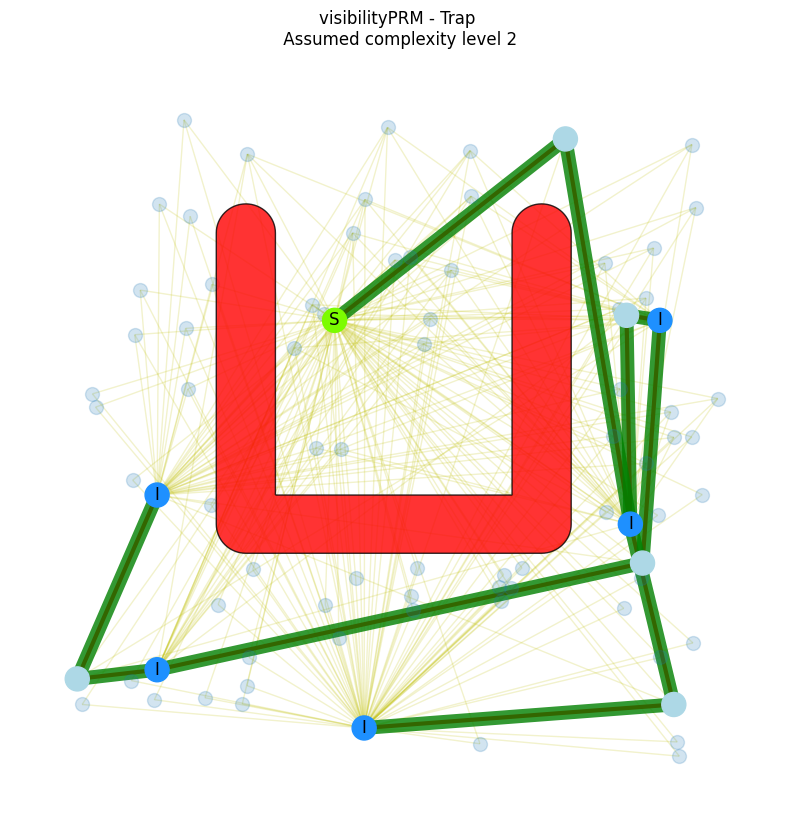

In [254]:
import matplotlib.pyplot as plt

for result in resultList:
    fig_local = plt.figure(figsize=(10,10))
    ax = fig_local.add_subplot(1,1,1)
    title = result.plannerFactoryName + " - " + result.benchmark.name
    if result.solution == []:
        title += " (No path found!)"
    title += "\n Assumed complexity level " + str(result.benchmark.level)
    ax.set_title(title)

    ax.grid(True)
    print(plannerFactory[result.plannerFactoryName][2])
    print("Planner: "+ str(result.planner))

    try:
        #IPVISBasicsPRM.basicPRMVisualize(result.planner, result.solution, ax=ax, nodeSize=100))
        plannerFactory[result.plannerFactoryName][2](result.planner, result.solution, ax=ax, nodeSize=100)
        print("")
        print("Planner: "+ str(result.planner))
        print("Solution" + str(result.solution))

    except Exception as e:
        print ("Error")
        print(e)
        pass
    

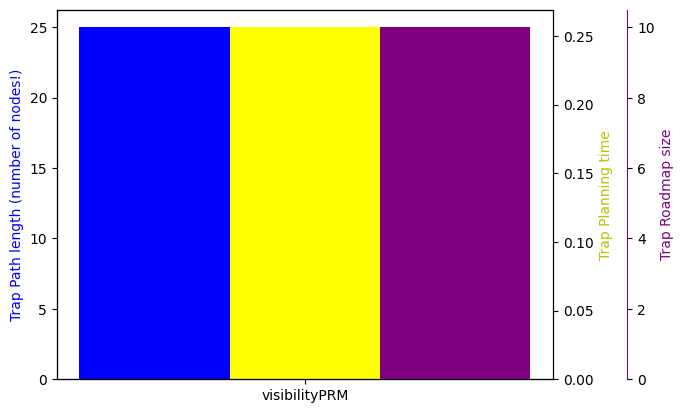

In [255]:
import numpy as np
for bench in testList:
    title = bench.name
    pathLength = dict()
    planningTime = dict()
    roadmapSize  = dict()
    
    try:
        for result in resultList:
            if result.benchmark.name == bench.name:
                #print result.benchmark.name  + " - " +  result.plannerFactoryName, len(result.solution)
                pathLength[result.plannerFactoryName] = len(result.solution)
                planningTime[result.plannerFactoryName] = result.perfDataFrame.groupby(["name"]).sum(numeric_only=True)["time"]["planRoundPath"]
                roadmapSize[result.plannerFactoryName] = result.planner.graph.size()


        fig, ax = plt.subplots()

        width = 0.2

        ax.bar(np.arange(len(pathLength.keys())), pathLength.values(),width, color="blue")
        ax.set_ylabel(title + " Path length (number of nodes!)", color="blue")
        ax.set_xticks(np.arange(len(pathLength.keys())) + width)
        ax.set_xticklabels(pathLength.keys())

        ax2 = ax.twinx()
        bar = ax2.bar(np.arange(len(pathLength.keys()))+width, planningTime.values(),width, color="red")
        ax2.set_ylabel(title + " Planning time", color="y")

        # Add coloring and patterns on axis two
        hatches = ['x' if length==0 else '' for length in pathLength.values()]
        color   = ['red' if length==0 else 'yellow' for length in pathLength.values()]
        for i,thisbar in enumerate(bar.patches):
            thisbar.set_facecolor(color[i])
            thisbar.set_hatch(hatches[i])

        # Multiple axes 
        ax3 = ax.twinx()
        ax3.bar(np.arange(len(pathLength.keys()))+2*width, roadmapSize.values(),width, color="purple")
        ax3.set_ylabel(title + " Roadmap size",  color="purple")
        ax3.spines['right'].set_position(('axes', 1.15))
        ax3.spines['right'].set_color("purple")
    except:
        pass


    
        
    

result.perfDataFrame.groupby(["name"]).sum()

In [256]:
result.perfDataFrame.groupby(["name"]).sum(numeric_only=True)

,time
name,
_findNearestInterim,0.002003
_getRandomFreePosition,0.002000
_learnRoadmap,0.223119
lineInCollision,0.220121
planRoundPath,0.256306
pointInCollision,0.196117


In [257]:
result.perfDataFrame[result.perfDataFrame["name"]=="planRoundPath"]

,name,args,kwargs,retVal,time
6245,planRoundPath,(<CC_IPVisibilityPRM_Roundtrip.VisPRM object a...,{},"[start, 74, interim1, 0, interim3, 1, interim2...",0.256306


In [258]:
result.perfDataFrame[result.perfDataFrame["name"]=="planRoundPath"][result.perfDataFrame["retVal"]==False]["time"].sum(numeric_only=True)

C:\Users\andre\AppData\Local\Temp\ipykernel_22804\2940436852.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.perfDataFrame[result.perfDataFrame["name"]=="planRoundPath"][result.perfDataFrame["retVal"]==False]["time"].sum(numeric_only=True)


0.0